# Imports

In [186]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

import json

# Defining plot styles

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, kde, gaussian_kde
import matplotlib
from matplotlib import rc

import pandas as pd

In [188]:


plt.rcParams['font.family'] = 'serif'
#plt.rcParams['text.usetex'] = True
plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman']

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 26
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18



# Loading data

In [189]:
def load_results(src_lang, tgt_lang):
    json_fn = '../data/tatoeba/' + src_lang + '-' + tgt_lang + "_results.json"

    with open(json_fn, 'r') as json_file:
        results = json.load(json_file)
        json_file.close()
        
    
    return results

def preprocess(results):
    df = pd.DataFrame(results).transpose()
    df = df.fillna(0)
    df.index.name = 'word'
    df['characters'] = df.index.map(lambda w: len(w))
    
#     df['count'] = df['wrong_gold'] + df['correct_gold']
    
    df['occurence'] = pd.cut(df['count'], bins=[ 0,9,100,1000000], labels=['1-9', '10-100', '>100'])
    #df['occurence'] = pd.cut(df['count'], bins=[ 0,4,9,14,19,29, 39,100,1000000], labels=['1-4', '5-9', '10-14', '15-19', '20-29', '30-39','40-100', '>100'])
    df['mid_frequency'] =  (df['count'] >= 10 ) & (df['count'] < 100 ) #& (df['correct_gold'] > 0)# | (df['correct_mt'] > 0))
    df['characters_bins'] = pd.cut(df['characters'],bins=[0,5, 10, 15, 10000], labels=['<=5', '5-10', '10-15', '>15'])
    df = df.sort_values(by=['count'])
    df['characters_by_tokens'] = df['characters'] / df['tokens']
    df['accuracy_mt'] = df['correct_mt'] / (df['correct_mt'] + df['miss_mt'])
    df['accuracy_gold'] = df['correct_gold'] / (df['correct_gold'] + df['miss_gold'])

    #df = df[(df['correct_gold'] > 0.)] # | (df['correct_mt'] > 0.)]
    return df
    

In [190]:
results_de = load_results("en", "de")
results_he = load_results("en", "he")

df_de = preprocess(results_de)
df_he = preprocess(results_he)


In [191]:
df_de['occurence'].value_counts()


1-9       10910
10-100     3139
>100        499
Name: occurence, dtype: int64

In [192]:
df_de['tokens'].value_counts()

2.0    5625
3.0    4037
1.0    3759
4.0     979
5.0     129
6.0      16
7.0       3
Name: tokens, dtype: int64

In [193]:

df_de['mid_frequency'].value_counts()

False    11414
True      3134
Name: mid_frequency, dtype: int64

In [194]:
df_de['characters_bins'].value_counts()

5-10     8564
10-15    2882
<=5      2823
>15       279
Name: characters_bins, dtype: int64

In [195]:

df_de[df_de['mid_frequency']]['tokens'].value_counts()

2.0    1234
1.0    1216
3.0     585
4.0      93
5.0       6
Name: tokens, dtype: int64

array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'tokens'}>, <AxesSubplot:>]],
      dtype=object)

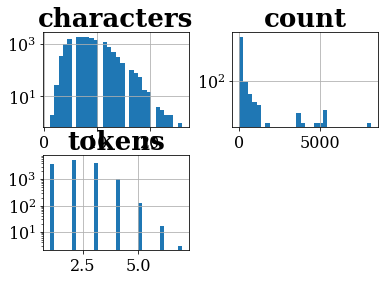

In [196]:
df_de.hist(column=['characters', 'count', 'tokens'], bins=30, log=True)

In [197]:
df_he['occurence'].value_counts() / len(df_he)



1-9       0.801276
10-100    0.183636
>100      0.015088
Name: occurence, dtype: float64

In [198]:

df_he['tokens'].value_counts()


1.0    5860
2.0    2011
3.0     255
4.0      24
5.0       2
Name: tokens, dtype: int64

In [199]:

df_he['characters_bins'].value_counts()

<=5      5749
5-10     2392
10-15      11
>15         0
Name: characters_bins, dtype: int64

In [200]:

df_he['mid_frequency'].value_counts()

False    6656
True     1496
Name: mid_frequency, dtype: int64

In [201]:

df_he[df_he['mid_frequency']]['tokens'].value_counts()

1.0    1364
2.0     123
3.0       6
4.0       3
Name: tokens, dtype: int64

array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'tokens'}>, <AxesSubplot:>]],
      dtype=object)

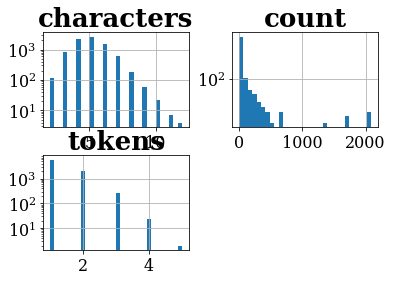

In [202]:
df_he.hist(column=['characters', 'count', 'tokens'], bins=30, log=True)

# Result Plots German

In [203]:
plot_de = pd.melt(df_de, value_vars=['accuracy_mt', 'accuracy_gold'], id_vars=['characters_bins', 'occurence', 'tokens', 'mid_frequency'], var_name='type',value_name='recall')
plot_de = plot_de[plot_de['type']=='accuracy_mt']

In [204]:
plot_de

,characters_bins,occurence,tokens,mid_frequency,type,recall
0,<=5,1-9,2.0,False,accuracy_mt,0.000000
1,10-15,1-9,2.0,False,accuracy_mt,NaN
2,10-15,1-9,3.0,False,accuracy_mt,NaN
3,5-10,1-9,2.0,False,accuracy_mt,NaN
4,5-10,1-9,2.0,False,accuracy_mt,NaN
...,...,...,...,...,...,...
14543,<=5,>100,1.0,False,accuracy_mt,0.200171
14544,<=5,>100,1.0,False,accuracy_mt,0.511749
14545,<=5,>100,1.0,False,accuracy_mt,0.468750
14546,<=5,>100,1.0,False,accuracy_mt,0.357830


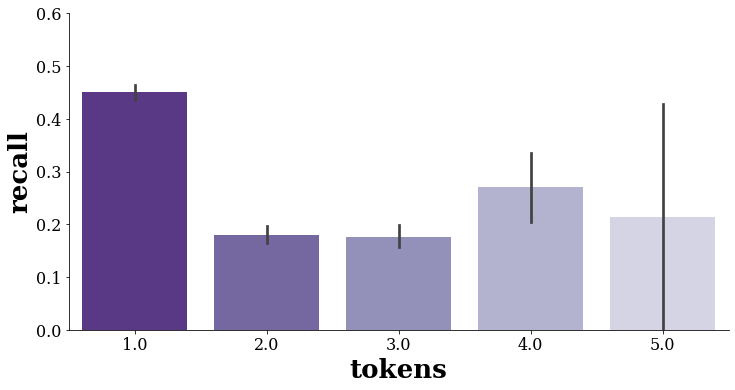

In [205]:
g = sns.catplot(x="tokens", y="recall",
                data=plot_de, kind="bar",# col='type',
                palette=sns.color_palette('Purples_r'),
                height=6, aspect=1.8)
fig = g.fig
axes = g.axes

#fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_xlim(left=-0.5, right=4.5)
axes[0,0].set_ylim(bottom=0., top=.6)
plt.tight_layout()
#plt.savefig(os.path.join('..','graphs','graph_1_mid_frequency_German.pdf'), dpi=300)

plt.show()

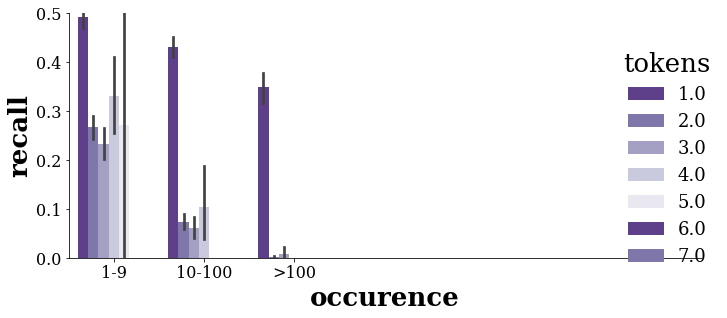

In [206]:
g = sns.catplot(x="occurence", y="recall", hue='tokens',
                data=plot_de, kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 5),
                height=5, aspect=1.8)
fig = g.fig
axes = g.axes

#fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_xlim(left=-0.5, right=6.5)
axes[0,0].set_ylim(bottom=0., top=.5)
plt.tight_layout()
plt.savefig(os.path.join('..','graphs','graph_1_mid_frequency_German.pdf'), dpi=300)

plt.show()

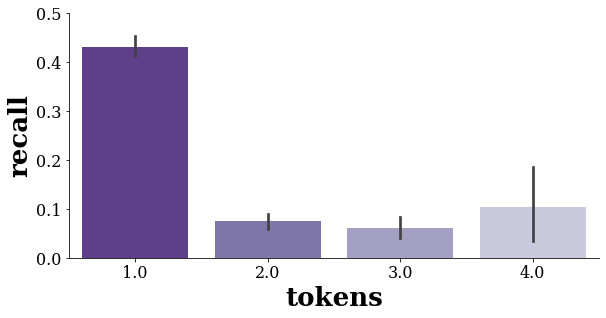

In [207]:
g = sns.catplot(x="tokens", y="recall",
                data=plot_de[plot_de['mid_frequency']], kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 5),
                height=5, aspect=1.8)
fig = g.fig
axes = g.axes

#fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_xlim(left=-0.5, right=3.5)
axes[0,0].set_ylim(bottom=0., top=.5)
plt.tight_layout()
plt.savefig(os.path.join('..','graphs','graph_1_mid_frequency_German.pdf'), dpi=300)

plt.show()

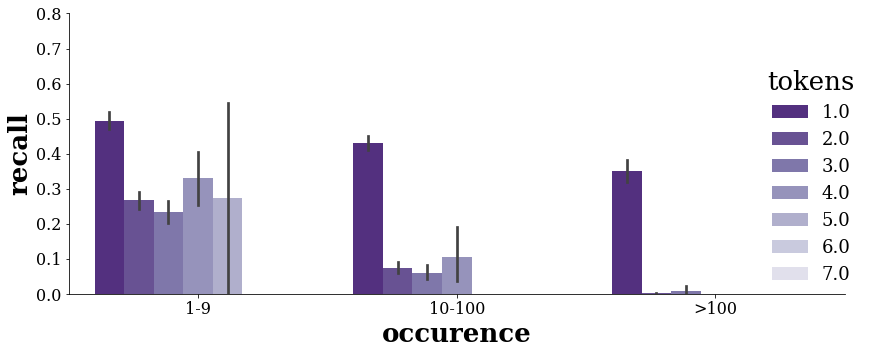

In [208]:
g = sns.catplot(x="occurence", y="recall",
                hue="tokens",
                data=plot_de, kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 8),
                height=5.5, aspect=2, legend=True)
fig = g.fig
axes = g.axes
#axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
#fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and frequency', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)

axes[0,0].set_ylim(bottom=0., top=.8)
plt.tight_layout()
plt.savefig(os.path.join('..','graphs','graph_1_all_frequencies_German.pdf'), dpi=300)

plt.show()

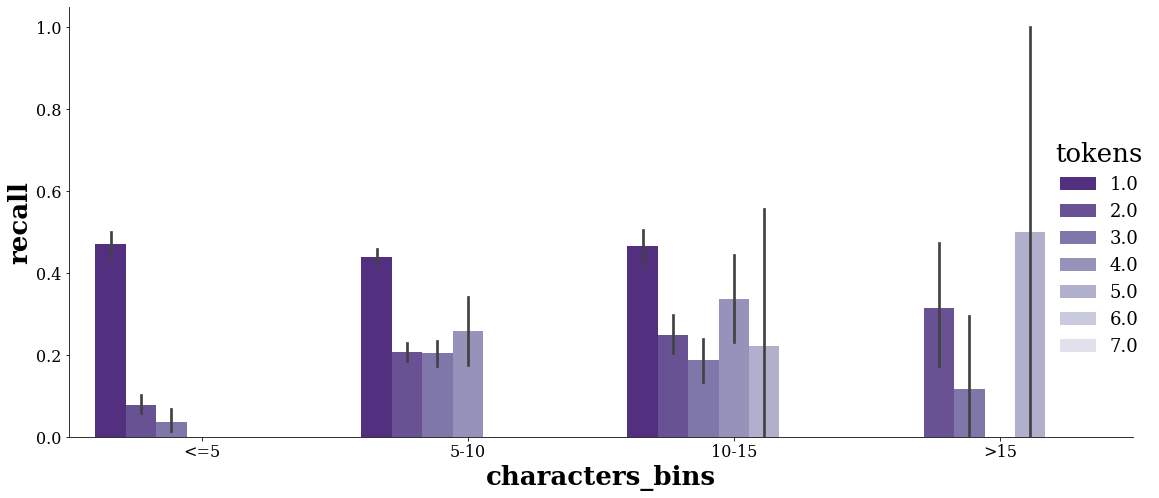

In [209]:
g = sns.catplot(x="characters_bins", y="recall",
                hue="tokens",
                data=plot_de, kind="bar",#, col='type',
                palette=sns.color_palette('Purples_r', 8),
                height=7.5, aspect=2, legend=True)
fig = g.fig
axes = g.axes
#axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
#fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and number of characters', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()


# Result Plots Hebrew

In [210]:
plot_he = pd.melt(df_he, value_vars=['accuracy_mt', 'accuracy_gold'], id_vars=['characters_bins', 'occurence', 'tokens', 'mid_frequency'], var_name='type',value_name='recall')
plot_he = plot_he[plot_he['type']=='accuracy_mt']

In [211]:
plot_he

,characters_bins,occurence,tokens,mid_frequency,type,recall
0,<=5,1-9,2.0,False,accuracy_mt,NaN
1,5-10,1-9,1.0,False,accuracy_mt,1.000000
2,<=5,1-9,2.0,False,accuracy_mt,NaN
3,<=5,1-9,1.0,False,accuracy_mt,NaN
4,5-10,1-9,1.0,False,accuracy_mt,NaN
...,...,...,...,...,...,...
8147,<=5,>100,1.0,False,accuracy_mt,0.235602
8148,<=5,>100,1.0,False,accuracy_mt,0.899449
8149,<=5,>100,1.0,False,accuracy_mt,0.599848
8150,<=5,>100,1.0,False,accuracy_mt,0.180967


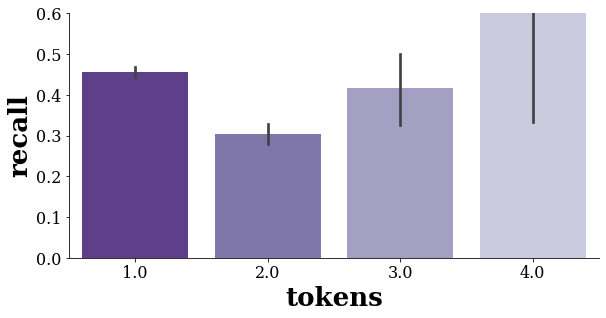

In [212]:
g = sns.catplot(x="tokens", y="recall",
                data=plot_he, kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 5),
                height=5, aspect=1.8)
fig = g.fig
axes = g.axes

#fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_xlim(left=-0.5, right=3.5)
axes[0,0].set_ylim(bottom=0., top=.6)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

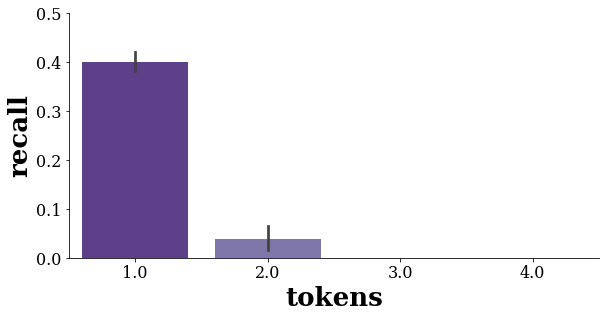

In [213]:
g = sns.catplot(x="tokens", y="recall",
                data=plot_he[plot_he['mid_frequency']], kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 5),
                height=5, aspect=1.8)
fig = g.fig
axes = g.axes

#fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_xlim(left=-0.5, right=3.5)
axes[0,0].set_ylim(bottom=0., top=.5)
plt.tight_layout()

plt.tight_layout()
plt.savefig(os.path.join('..','graphs','graph_1_mid_frequency_Hebrew.pdf'), dpi=300)
plt.show()

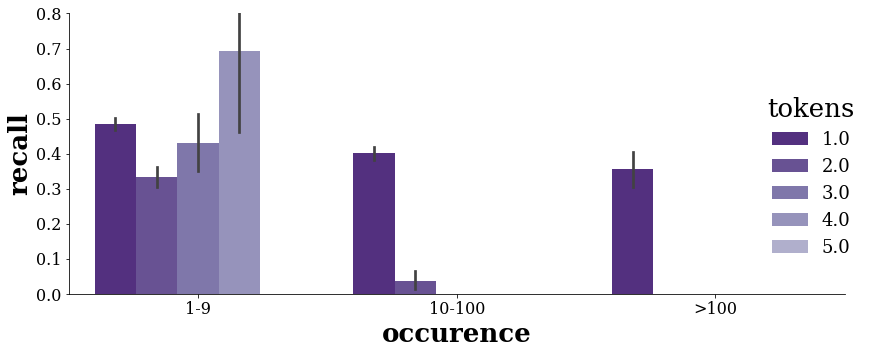

In [214]:
g = sns.catplot(x="occurence", y="recall",
                hue="tokens",
                data=plot_he, kind="bar",# col='type',
                palette=sns.color_palette('Purples_r', 8),
                height=5.5, aspect=2, legend=True)
fig = g.fig
axes = g.axes
#axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
#fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and frequency', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)

axes[0,0].set_ylim(bottom=0., top=.8)

plt.tight_layout()
plt.savefig(os.path.join('..','graphs','graph_1_all_frequencies_Hebrew.pdf'), dpi=300)
plt.show()

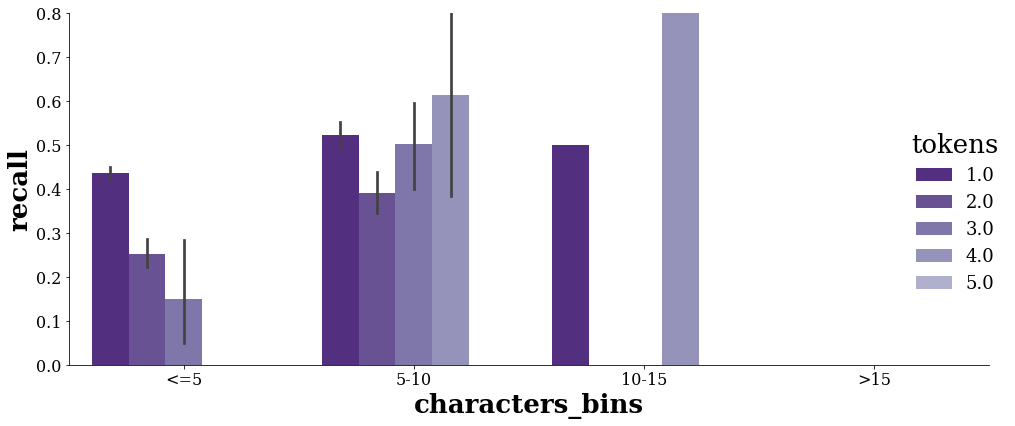

In [215]:
g = sns.catplot(x="characters_bins", y="recall",
                hue="tokens",
                data=plot_he, kind="bar",#, col='type',
                palette=sns.color_palette('Purples_r', 8),
                height=6.5, aspect=2, legend=True)
fig = g.fig
axes = g.axes
#axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
#fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and number of characters', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
axes[0,0].set_ylim(bottom=0., top=.8)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

## Exploratory correlations

<AxesSubplot:>

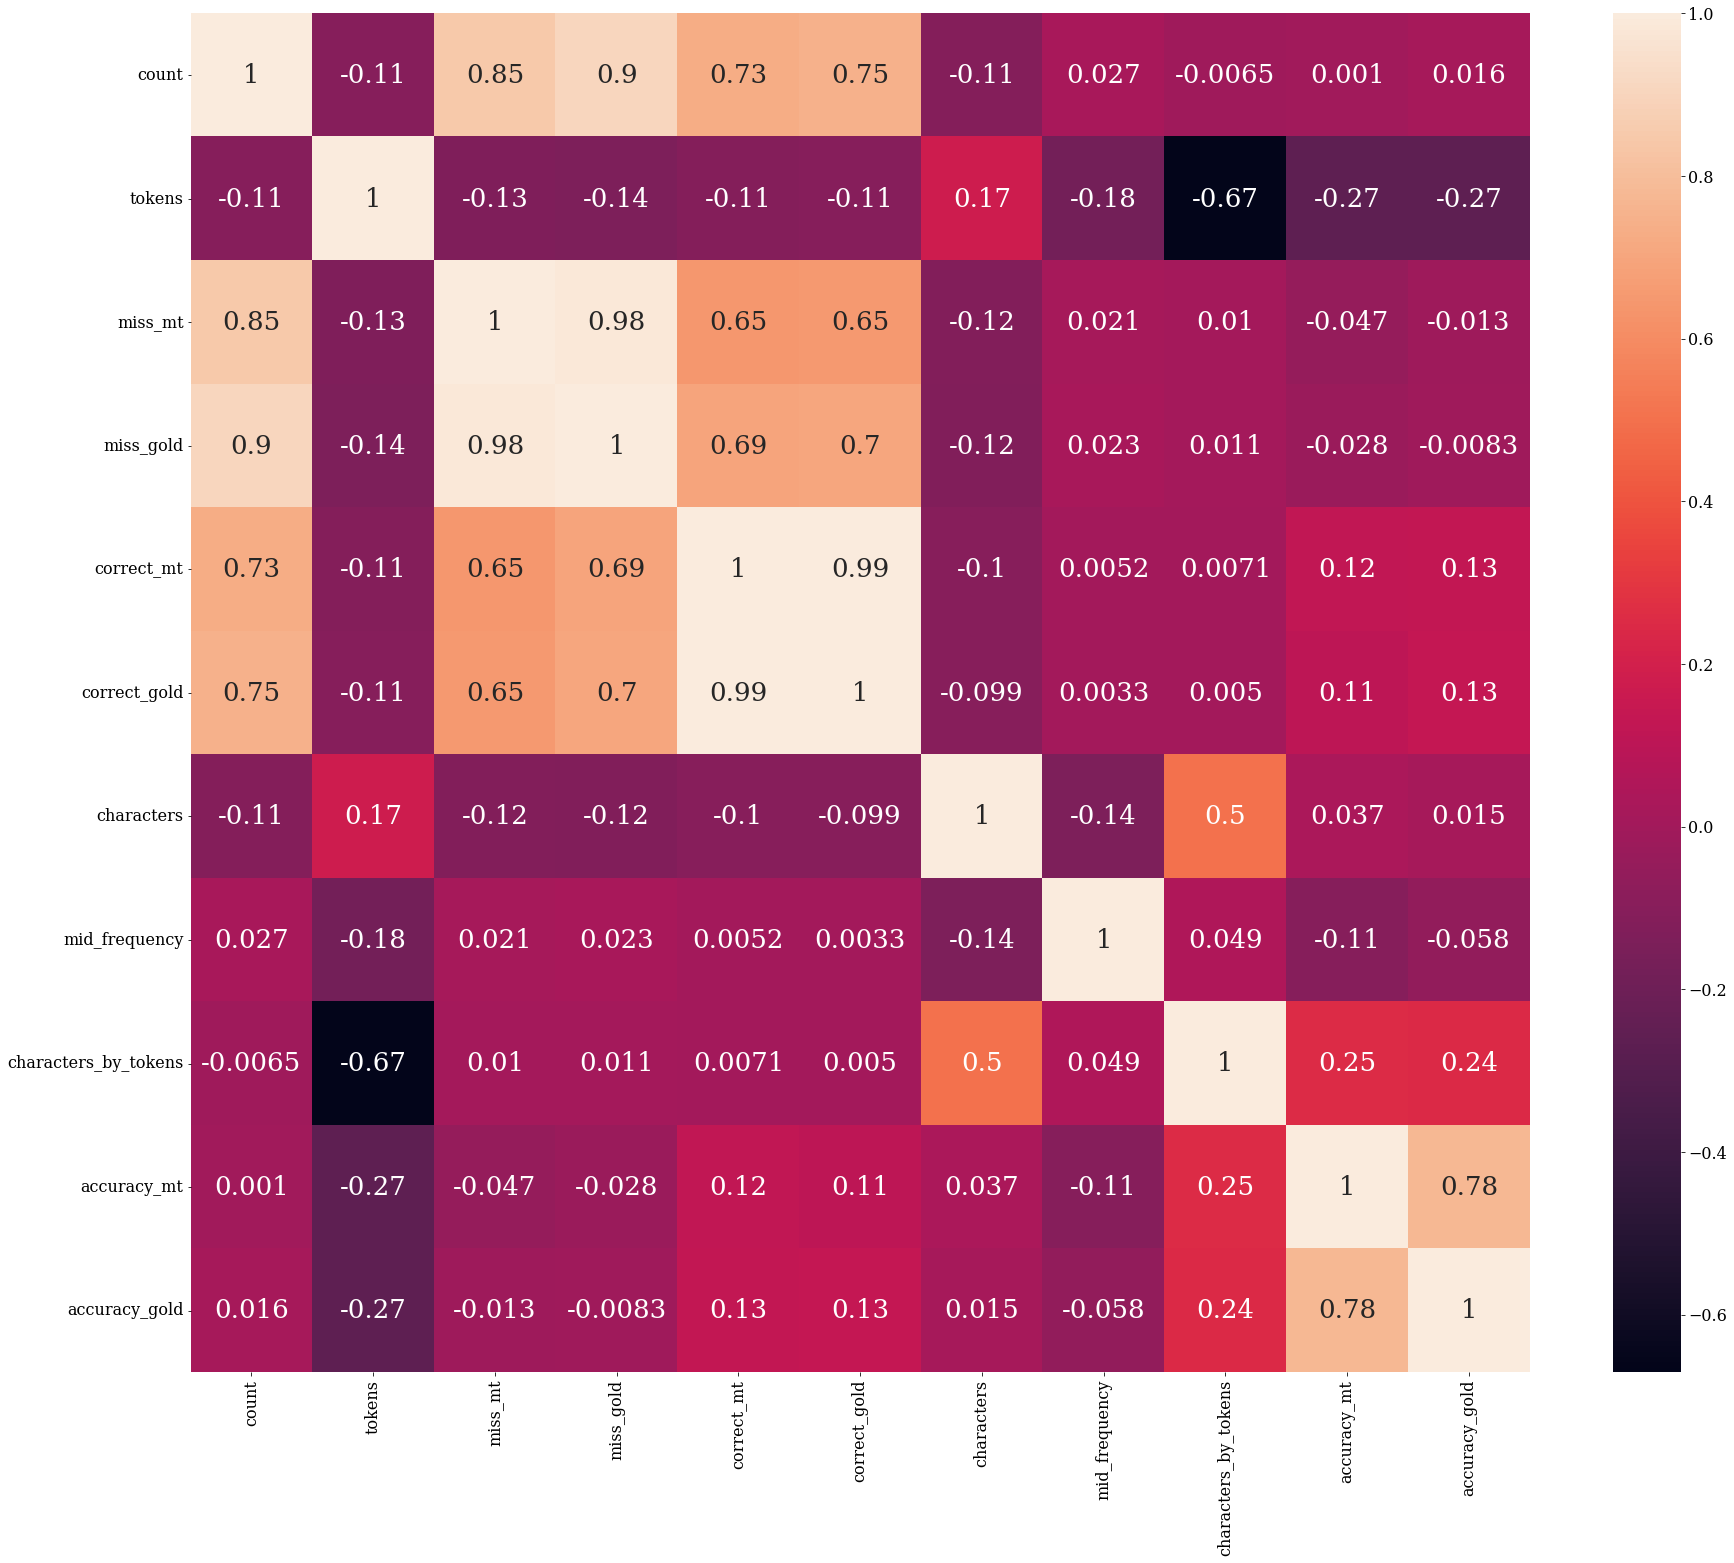

In [216]:
cormat = df_de.corr()
round(cormat,2)
plt.figure(figsize = (30,25))
sns.heatmap(cormat, annot=True)

<AxesSubplot:>

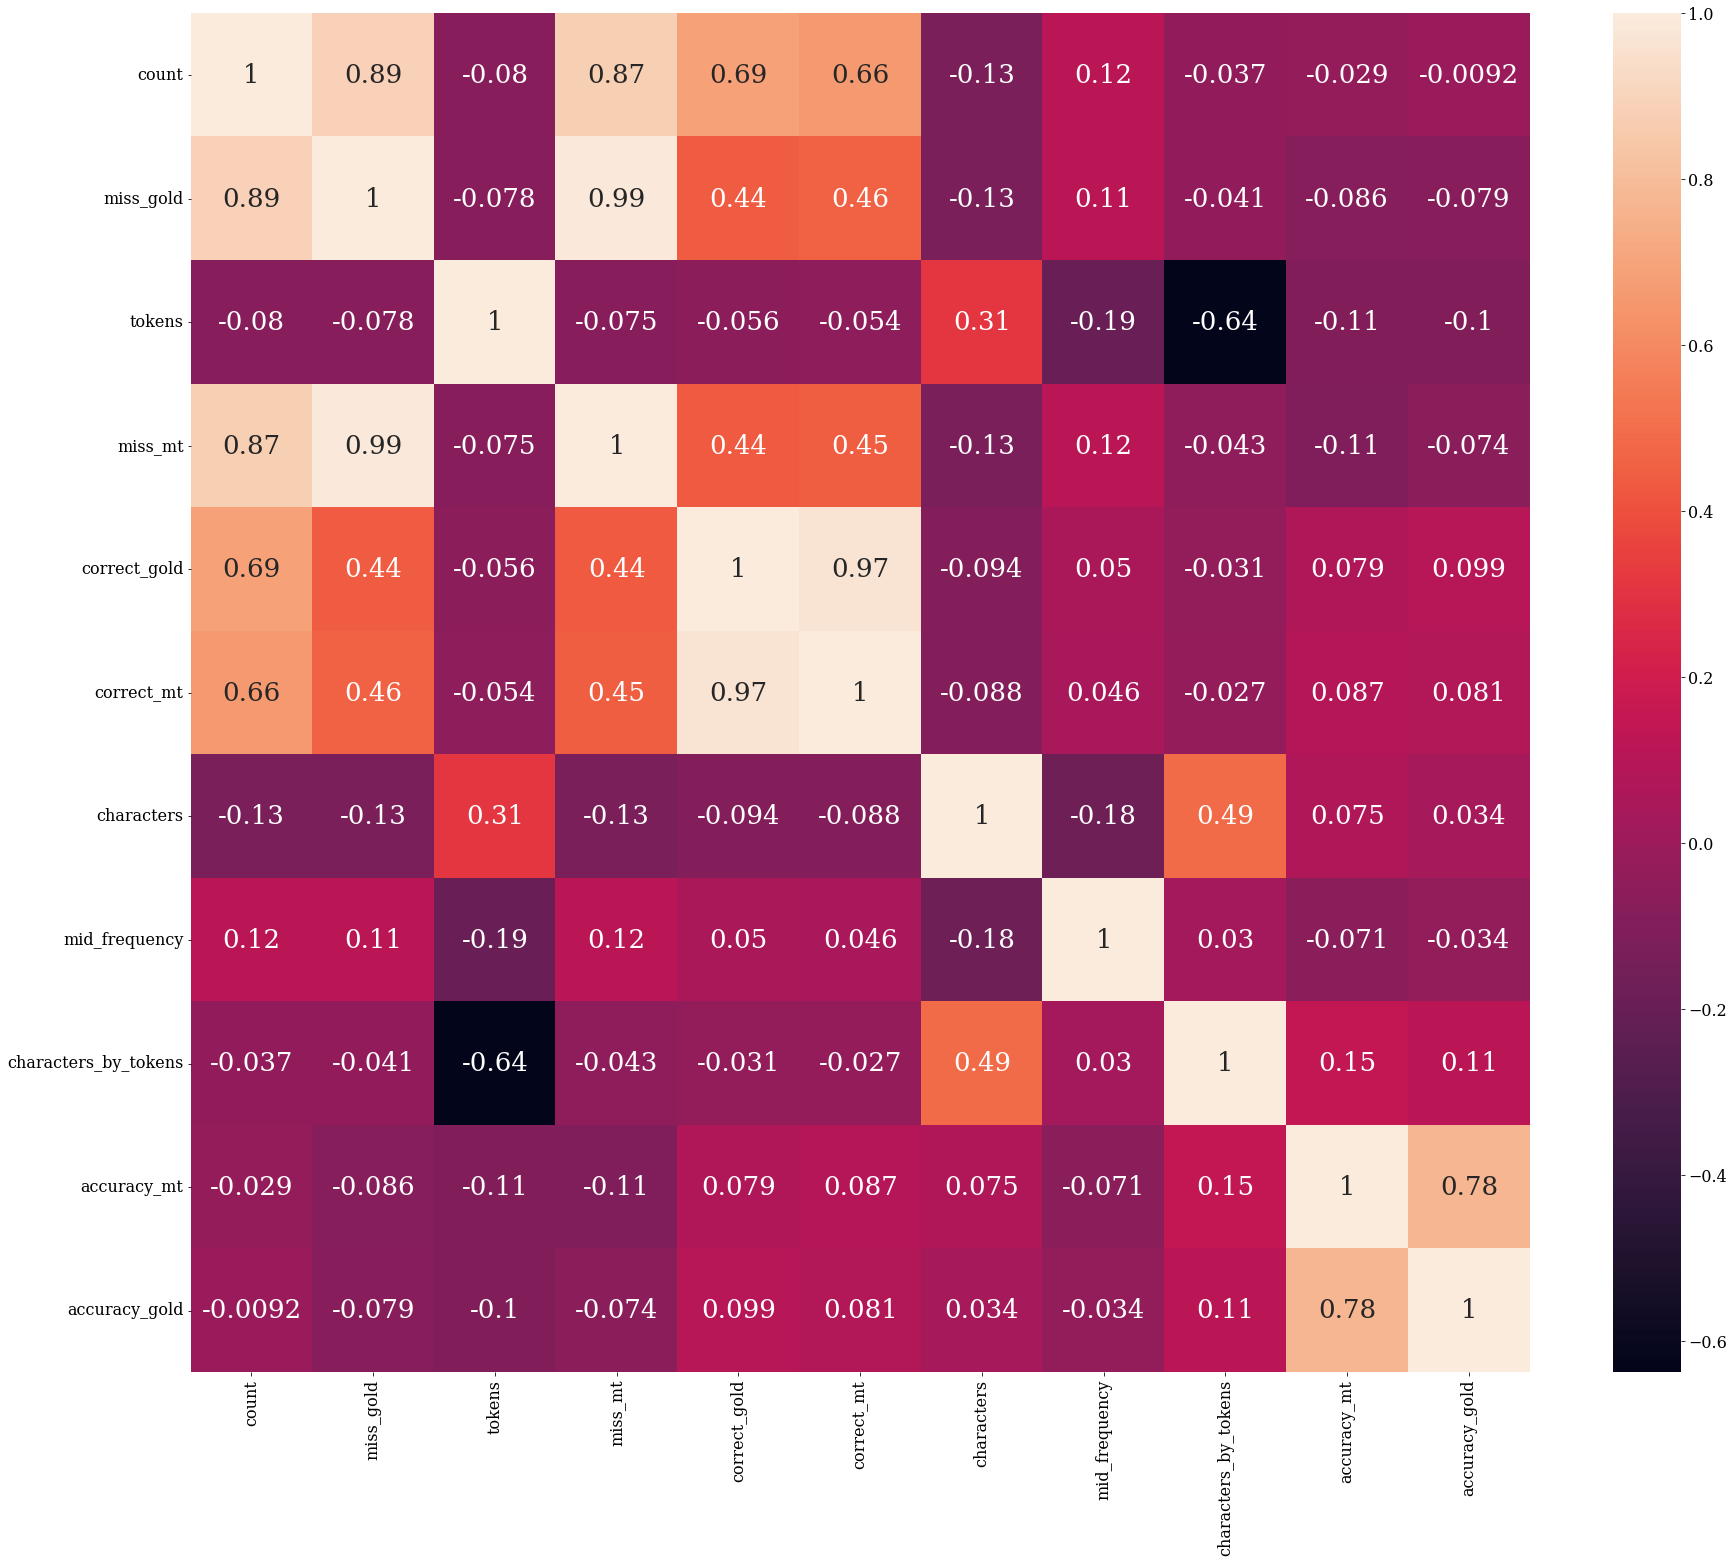

In [217]:
cormat = df_he.corr()
round(cormat,2)
plt.figure(figsize = (30,25))
sns.heatmap(cormat, annot=True)